In [1]:
from sheets import data, headers
import pandas as pd
import plotly.express as px
from datetime import datetime

In [2]:
df = pd.read_csv("../data/matches.csv")
df["date"] = pd.to_datetime(df["date"])
df["city"] = df["city"].fillna("Dubai")
df["team1"] = df["team1"].replace("Rising Pune Supergiants", "Rising Pune Supergiant")
df["team2"] = df["team2"].replace("Rising Pune Supergiants", "Rising Pune Supergiant")
df["winner"] = df["winner"].replace("Rising Pune Supergiants", "Rising Pune Supergiant")
df["city"] = df["city"].replace("Bangalore", "Bengaluru")

In [3]:
# x: season; y: wins; color: team

In [4]:
# df_2008 = df["winner"].loc[df["season"]==2008].value_counts()
year = 2008
df_year = df["winner"].loc[df["season"]==year].value_counts().rename_axis('teams').reset_index(name='wins')
df_year["season"] = year
df_year

,teams,wins,season
0,Rajasthan Royals,13,2008
1,Kings XI Punjab,10,2008
2,Chennai Super Kings,9,2008
3,Mumbai Indians,7,2008
4,Delhi Daredevils,7,2008
5,Kolkata Knight Riders,6,2008
6,Royal Challengers Bangalore,4,2008
7,Deccan Chargers,2,2008


In [5]:
# year = 2009
# while year<=2019:
#     df_append = df["winner"].loc[df["season"]==year].value_counts().rename_axis('teams').reset_index(name='wins')
#     df_append["season"] = year
#     df_year
def wps(year):
    df_year = df["winner"].loc[df["season"]==year].value_counts().rename_axis('teams').reset_index(name='wins')
    df_year["season"] = year
    return df_year

frames = [None]*12
for i in range(2008, 2020):
    frames[i-2008] = wps(i)

In [6]:
df_plot = pd.concat(frames)
df_plot

,teams,wins,season
0,Rajasthan Royals,13,2008
1,Kings XI Punjab,10,2008
2,Chennai Super Kings,9,2008
3,Mumbai Indians,7,2008
4,Delhi Daredevils,7,2008
...,...,...,...
3,Kings XI Punjab,6,2019
4,Kolkata Knight Riders,6,2019
5,Sunrisers Hyderabad,6,2019
6,Rajasthan Royals,5,2019


In [15]:
fig = px.line(df_plot, x="season", y="wins", color="teams")
fig.update_layout(
    xaxis = dict(
        tickmode = 'linear',
        )
)
fig.show()

In [8]:
fig = px.scatter(df_plot, x="season", y="wins", size="wins", color="teams", range_color=["86aae3", "0b3a85"])
fig.show()

In [9]:
df_plot2 = df_plot.loc[df_plot["teams"].isin(["Kings XI Punjab", "Mumbai Indians"])]

In [10]:
fig = px.line(df_plot2, x="season", y="wins", color="teams")
fig.show()

In [11]:
piv_table = pd.pivot_table(df_plot, values="wins", index = ["teams", "season"])

In [12]:
piv_table

wins
teams               season      
Chennai Super Kings 2008       9
                    2009       8
                    2010       9
                    2011      11
                    2012      10
...                          ...
Sunrisers Hyderabad 2015       7
                    2016      11
                    2017       8
                    2018      10
                    2019       6

[100 rows x 1 columns]

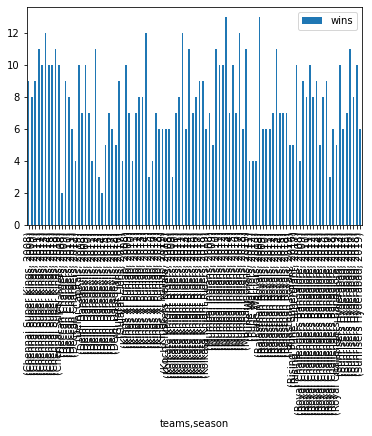

In [13]:
piv_table.plot(kind='bar')

In [14]:
import seaborn as sns

sns.barplot(x='season', y='wins', hue='teams', data=piv_table)

ValueError: Could not interpret input 'season'